In [4]:
import pandas as pd

data = {
    "incident": [
        # High priority incidents (40 total)
        "Armed robbery near city bank",
        "Fire accident reported in residential building",
        "Explosion in chemical factory",
        "Suspicious package found at airport",
        "Hostage situation in downtown mall",
        "Major car accident with injuries on highway",
        "Active shooter reported in school",
        "Gas leak detected in metro station",
        "Terrorist threat received at government office",
        "Flooding reported in subway tunnels",
        "Arson suspected in warehouse fire",
        "Bomb threat at railway station",
        "Armed assault in shopping complex",
        "Bridge collapse on national highway",
        "Earthquake tremors felt in city",
        "Severe building collapse in industrial area",
        "Gunfire reported outside embassy",
        "Dangerous chemical spill on highway",
        "Train derailment with casualties",
        "Helicopter crash in residential zone",

        # 🔥 Extra 20 High Priority
        "Massive fire broke out in city hospital",
        "Building on fire with people trapped inside",
        "Explosion reported in crowded marketplace",
        "Multiple car crash with casualties on expressway",
        "Firefighters called to control warehouse blaze",
        "Armed men spotted outside government building",
        "Child kidnapped from shopping center",
        "Crowd stampede during festival event",
        "Severe landslide blocking mountain road",
        "Hospital ward evacuated due to gas leak",
        "Bridge collapsed causing vehicles to fall",
        "Arson attack reported in residential flats",
        "Armed robbery inside jewelry store",
        "Train collision near railway junction",
        "Chemical fumes leaking in school laboratory",
        "Bus overturned with passengers injured",
        "Earthquake caused multiple building damages",
        "Fire alarm triggered in crowded cinema hall",
        "Explosion suspected in oil refinery",
        "Flood water entered houses in low-lying areas",

        # Low priority incidents (30 total)
        "Traffic congestion in market area",
        "Noise complaint from neighborhood",
        "Streetlight not working in colony",
        "Lost pet reported near park",
        "Garbage collection delayed in locality",
        "Illegal parking in front of hospital",
        "Minor water leakage in public washroom",
        "Stray dogs creating nuisance",
        "Small fender bender, no injuries",
        "Public park fountain not working",
        "Broken bench in city park",
        "Graffiti spotted on public wall",
        "Street vendor blocking sidewalk",
        "Water supply disruption for few hours",
        "Overcrowding in city bus stop",
        "Elevator stuck but no injuries",
        "Potholes reported on main road",
        "Tree branches blocking footpath",
        "Electric pole tilting but intact",
        "Unauthorized loudspeaker in event",
        "Dustbin not cleared in apartment complex",
        "Public restroom out of order",
        "Street flooded due to clogged drain",
        "Dog barking disturbing neighbors",
        "Minor electricity fluctuation reported",
        "Broken traffic signal light",
        "Overgrown bushes blocking footpath",
        "Shop playing loud music late night",
        "Slow moving traffic on bridge",
        "Complaint of mosquitoes in colony"
    ],
    "priority": [
        # High labels (40)
        *["High"]*40,
        # Low labels (30)
        *["Low"]*30
    ]
}

df = pd.DataFrame(data)
df.to_csv("incidents.csv", index=False)

print("✅ incidents.csv file created with", len(df), "examples!")


✅ incidents.csv file created with 70 examples!


In [5]:
from google.colab import files
files.download("incidents.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 2: Load dataset
df = pd.read_csv("incidents.csv")

# Step 3: Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    df["incident"], df["priority"], test_size=0.2, random_state=42
)

# Step 4: Convert text into numbers (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Step 6: Train, evaluate, and test new incidents
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(classification_report(y_test, y_pred))

    # --- Test with new incidents ---
    new_incidents = [
        "Fire broke out in the hospital",
        "Streetlight not working",
        "Flood in the residential area",
        "Power cut in the entire city"
    ]

    new_incidents_vec = vectorizer.transform(new_incidents)
    preds = model.predict(new_incidents_vec)
    probs = model.predict_proba(new_incidents_vec)

    for text, pred, prob in zip(new_incidents, preds, probs):
        confidence = np.max(prob) * 100
        print(f"Incident: {text}\nPredicted: {pred}, Confidence: {confidence:.2f}%\n")



===== Naive Bayes =====
              precision    recall  f1-score   support

        High       0.77      1.00      0.87        10
         Low       1.00      0.25      0.40         4

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84      0.79      0.74        14

Incident: Fire broke out in the hospital
Predicted: High, Confidence: 71.61%

Incident: Streetlight not working
Predicted: Low, Confidence: 68.47%

Incident: Flood in the residential area
Predicted: High, Confidence: 65.51%

Incident: Power cut in the entire city
Predicted: High, Confidence: 59.50%


===== Logistic Regression =====
              precision    recall  f1-score   support

        High       0.77      1.00      0.87        10
         Low       1.00      0.25      0.40         4

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84      0.79      0.7


===== Naive Bayes =====
              precision    recall  f1-score   support

        High       0.77      1.00      0.87        10
         Low       1.00      0.25      0.40         4

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84      0.79      0.74        14

Incident: Fire broke out in the hospital
Predicted: High, Confidence: 71.61%

Incident: Streetlight not working
Predicted: Low, Confidence: 68.47%

Incident: Flood in the residential area
Predicted: High, Confidence: 65.51%

Incident: Power cut in the entire city
Predicted: High, Confidence: 59.50%


===== Logistic Regression =====
              precision    recall  f1-score   support

        High       0.77      1.00      0.87        10
         Low       1.00      0.25      0.40         4

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84      0.79      0.7

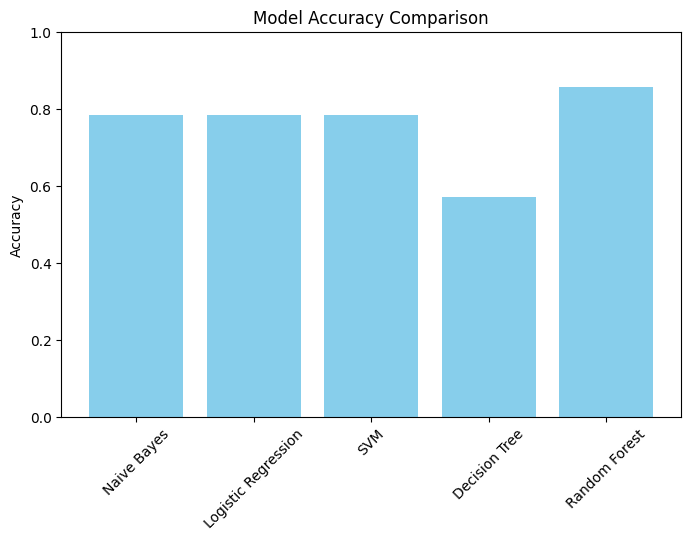

In [14]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Load dataset
df = pd.read_csv("incidents.csv")

# Step 3: Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    df["incident"], df["priority"], test_size=0.2, random_state=42
)

# Step 4: Convert text into numbers (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# To store accuracy for comparison
results = {}

# Step 6: Train, evaluate, and test new incidents
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(classification_report(y_test, y_pred))

    # Save accuracy for plotting
    results[name] = accuracy_score(y_test, y_pred)

    # --- Test with new incidents ---
    new_incidents = [
        "Fire broke out in the hospital",
        "Streetlight not working",
        "Flood in the residential area",
        "Power cut in the entire city"
    ]

    new_incidents_vec = vectorizer.transform(new_incidents)
    preds = model.predict(new_incidents_vec)
    probs = model.predict_proba(new_incidents_vec)

    for text, pred, prob in zip(new_incidents, preds, probs):
        confidence = np.max(prob) * 100
        print(f"Incident: {text}\nPredicted: {pred}, Confidence: {confidence:.2f}%\n")

# Step 7: Plot accuracy comparison
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()



===== Naive Bayes =====
              precision    recall  f1-score   support

        High       0.77      1.00      0.87        10
         Low       1.00      0.25      0.40         4

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84      0.79      0.74        14

Incident: Fire broke out in the hospital
Predicted: High, Confidence: 71.61%

Incident: Streetlight not working
Predicted: Low, Confidence: 68.47%

Incident: Flood in the residential area
Predicted: High, Confidence: 65.51%

Incident: Power cut in the entire city
Predicted: High, Confidence: 59.50%


===== Logistic Regression =====
              precision    recall  f1-score   support

        High       0.77      1.00      0.87        10
         Low       1.00      0.25      0.40         4

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84      0.79      0.7

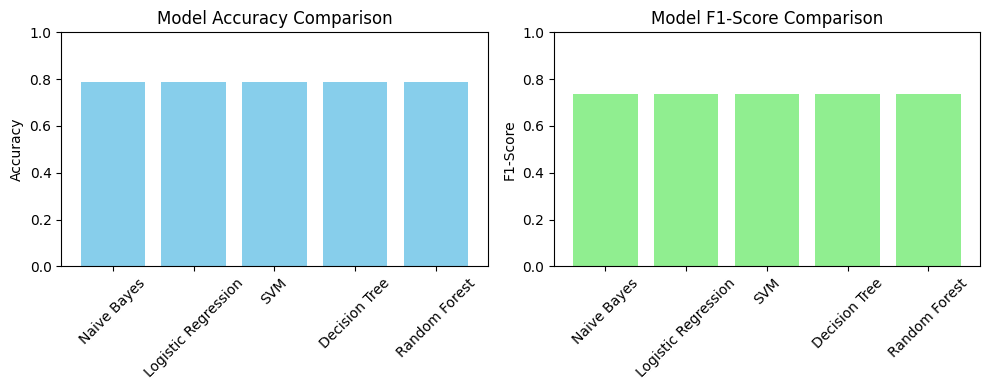

In [15]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Step 2: Load dataset
df = pd.read_csv("incidents.csv")

# Step 3: Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    df["incident"], df["priority"], test_size=0.2, random_state=42
)

# Step 4: Convert text into numbers (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# To store results
results = {"Model": [], "Accuracy": [], "F1-Score": []}

# Step 6: Train, evaluate, and test new incidents
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(classification_report(y_test, y_pred))

    # Save metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")  # handles imbalance
    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["F1-Score"].append(f1)

    # --- Test with new incidents ---
    new_incidents = [
        "Fire broke out in the hospital",
        "Streetlight not working",
        "Flood in the residential area",
        "Power cut in the entire city"
    ]

    new_incidents_vec = vectorizer.transform(new_incidents)
    preds = model.predict(new_incidents_vec)
    probs = model.predict_proba(new_incidents_vec)

    for text, pred, prob in zip(new_incidents, preds, probs):
        confidence = np.max(prob) * 100
        print(f"Incident: {text}\nPredicted: {pred}, Confidence: {confidence:.2f}%\n")

# Step 7: Convert results into DataFrame for plotting
results_df = pd.DataFrame(results)

# Plot Accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(results_df["Model"], results_df["Accuracy"], color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Plot F1-Score
plt.subplot(1,2,2)
plt.bar(results_df["Model"], results_df["F1-Score"], color='lightgreen')
plt.title("Model F1-Score Comparison")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()



===== Naive Bayes =====
              precision    recall  f1-score   support

        High       0.77      1.00      0.87        10
         Low       1.00      0.25      0.40         4

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84      0.79      0.74        14

Incident: Fire broke out in the hospital
Predicted: High, Confidence: 71.61%

Incident: Streetlight not working
Predicted: Low, Confidence: 68.47%

Incident: Flood in the residential area
Predicted: High, Confidence: 65.51%

Incident: Power cut in the entire city
Predicted: High, Confidence: 59.50%


===== Logistic Regression =====
              precision    recall  f1-score   support

        High       0.77      1.00      0.87        10
         Low       1.00      0.25      0.40         4

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84      0.79      0.7

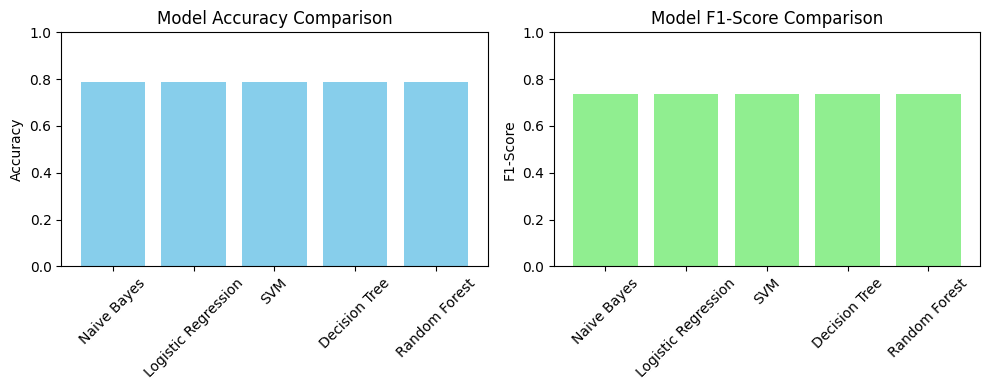

In [16]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Step 2: Load dataset
df = pd.read_csv("incidents.csv")

# Step 3: Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    df["incident"], df["priority"], test_size=0.2, random_state=42
)

# Step 4: Convert text into numbers (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# To store results
results = {"Model": [], "Accuracy": [], "F1-Score": []}

# Step 6: Train, evaluate, and test new incidents
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(classification_report(y_test, y_pred))

    # Save metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")  # handles imbalance
    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["F1-Score"].append(f1)

    # --- Test with new incidents ---
    new_incidents = [
        "Fire broke out in the hospital",
        "Streetlight not working",
        "Flood in the residential area",
        "Power cut in the entire city"
    ]

    new_incidents_vec = vectorizer.transform(new_incidents)
    preds = model.predict(new_incidents_vec)
    probs = model.predict_proba(new_incidents_vec)

    for text, pred, prob in zip(new_incidents, preds, probs):
        confidence = np.max(prob) * 100
        print(f"Incident: {text}\nPredicted: {pred}, Confidence: {confidence:.2f}%\n")

# Step 7: Convert results into DataFrame for summary
results_df = pd.DataFrame(results)
print("\n📊 Model Performance Summary:")
print(results_df)

# Step 8: Plot Accuracy & F1-Score
plt.figure(figsize=(10,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.bar(results_df["Model"], results_df["Accuracy"], color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)

# F1-Score plot
plt.subplot(1,2,2)
plt.bar(results_df["Model"], results_df["F1-Score"], color='lightgreen')
plt.title("Model F1-Score Comparison")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()




===== Naive Bayes =====
              precision    recall  f1-score   support

        High       0.77      1.00      0.87        10
         Low       1.00      0.25      0.40         4

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84      0.79      0.74        14

Incident: Fire broke out in the hospital
Predicted: High, Confidence: 71.61%

Incident: Streetlight not working
Predicted: Low, Confidence: 68.47%

Incident: Flood in the residential area
Predicted: High, Confidence: 65.51%

Incident: Power cut in the entire city
Predicted: High, Confidence: 59.50%


===== Logistic Regression =====
              precision    recall  f1-score   support

        High       0.77      1.00      0.87        10
         Low       1.00      0.25      0.40         4

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84      0.79      0.7

/tmp/ipython-input-4005987309.py:107: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


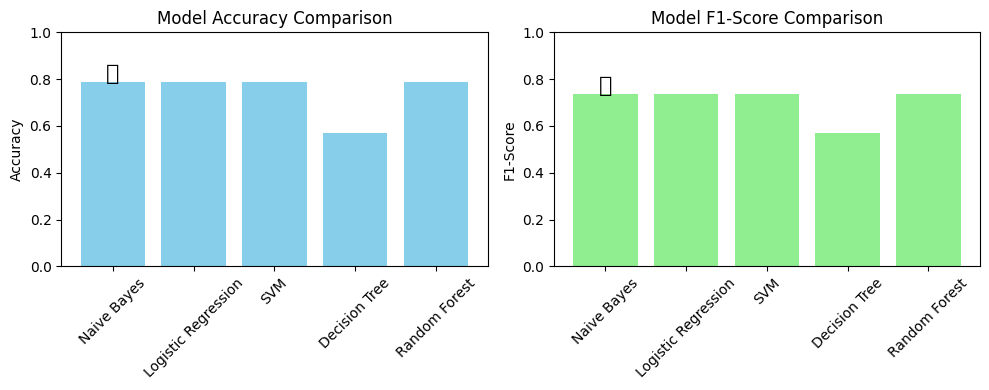

In [17]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Step 2: Load dataset
df = pd.read_csv("incidents.csv")

# Step 3: Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    df["incident"], df["priority"], test_size=0.2, random_state=42
)

# Step 4: Convert text into numbers (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# To store results
results = {"Model": [], "Accuracy": [], "F1-Score": []}

# Step 6: Train, evaluate, and test new incidents
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(classification_report(y_test, y_pred))

    # Save metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")  # handles imbalance
    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["F1-Score"].append(f1)

    # --- Test with new incidents ---
    new_incidents = [
        "Fire broke out in the hospital",
        "Streetlight not working",
        "Flood in the residential area",
        "Power cut in the entire city"
    ]

    new_incidents_vec = vectorizer.transform(new_incidents)
    preds = model.predict(new_incidents_vec)
    probs = model.predict_proba(new_incidents_vec)

    for text, pred, prob in zip(new_incidents, preds, probs):
        confidence = np.max(prob) * 100
        print(f"Incident: {text}\nPredicted: {pred}, Confidence: {confidence:.2f}%\n")

# Step 7: Convert results into DataFrame for summary
results_df = pd.DataFrame(results)

# Find best models
best_acc_idx = results_df["Accuracy"].idxmax()
best_f1_idx = results_df["F1-Score"].idxmax()

# Highlight best models
def highlight_best(val, col, best_idx):
    return "🏆" if val == results_df.loc[best_idx, col] else ""

results_df["Best_Acc"] = results_df.apply(lambda row: highlight_best(row["Accuracy"], "Accuracy", best_acc_idx), axis=1)
results_df["Best_F1"] = results_df.apply(lambda row: highlight_best(row["F1-Score"], "F1-Score", best_f1_idx), axis=1)

print("\n📊 Model Performance Summary:")
print(results_df)

# Step 8: Plot Accuracy & F1-Score
plt.figure(figsize=(10,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.bar(results_df["Model"], results_df["Accuracy"], color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.text(best_acc_idx, results_df["Accuracy"].max()+0.01, "⭐", ha='center', fontsize=16)

# F1-Score plot
plt.subplot(1,2,2)
plt.bar(results_df["Model"], results_df["F1-Score"], color='lightgreen')
plt.title("Model F1-Score Comparison")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.text(best_f1_idx, results_df["F1-Score"].max()+0.01, "⭐", ha='center', fontsize=16)

plt.tight_layout()
plt.show()
